In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
path ="/content/drive/MyDrive/newdataset/balanced.csv"
rf = pd.read_csv(path)
rf

,column0,column1,column2,column3,column4,column5,column6,column7,column8,column9,...,column67,column68,column69,column70,column71,column72,column73,column74,column75,label
0,-0.384207,-0.717000,-0.010751,-0.009105,-0.083818,-0.007928,-0.353974,0.564957,-0.178106,-0.393591,...,0.886017,-0.140358,-0.106988,-0.158560,-0.111225,-0.632052,-0.112634,-0.638060,-0.621565,0
1,-0.360718,-0.718105,-0.012008,-0.010059,-0.095402,-0.008075,-0.413711,-0.384893,-0.411630,-0.393591,...,0.886017,-0.140358,-0.106988,-0.158560,-0.111225,-0.632052,-0.112634,-0.638060,-0.621565,0
2,-0.384207,-0.717559,-0.010751,-0.009105,-0.083818,-0.007936,-0.353974,0.564957,-0.178106,-0.393591,...,-0.988016,-0.140358,-0.106988,-0.158560,-0.111225,-0.632052,-0.112634,-0.638060,-0.621565,0
3,-0.384207,-0.718104,-0.010751,-0.009105,-0.082598,-0.007979,-0.347686,0.664941,-0.153525,-0.393591,...,0.886017,-0.140358,-0.106988,-0.158560,-0.111225,-0.632052,-0.112634,-0.638060,-0.621565,0
4,-0.384207,-0.717530,-0.012008,-0.010059,-0.087628,-0.008018,-0.333537,0.889905,-0.098216,-0.393591,...,-0.988016,-0.140358,-0.106988,-0.158560,-0.111225,-0.632052,-0.112634,-0.638060,-0.621565,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387513,-0.382581,-0.457746,-0.003211,-0.006243,-0.045710,-0.003201,0.098773,-0.384893,-0.161206,0.089352,...,0.886017,-0.139162,-0.106988,-0.157794,-0.109839,-0.468034,-0.112634,-0.475500,-0.457466,1
387514,-0.382581,-0.457720,-0.006981,-0.006243,-0.023608,-0.006598,0.326719,-0.384893,0.167263,0.488999,...,0.886017,-0.139127,-0.106988,-0.157771,-0.109799,-0.467999,-0.112634,-0.475466,-0.457431,1
387515,-0.382581,-0.457813,-0.004468,-0.005289,-0.047539,-0.003201,0.079909,-0.384893,-0.135967,0.103692,...,0.886017,-0.139152,-0.106988,-0.157788,-0.109829,-0.468133,-0.112634,-0.475599,-0.457566,1
387516,-0.382581,-0.457816,-0.003211,-0.006243,-0.039156,-0.003201,0.166371,-0.384893,-0.128175,0.153053,...,0.886017,-0.139132,-0.106988,-0.157775,-0.109805,-0.468090,-0.112634,-0.475557,-0.457523,1


In [ ]:
class_distribution = rf['label'].value_counts()

# Print the count of instances with label 0 and 1
print("Label 0 count:", class_distribution[0])
print("Label 1 count:", class_distribution[1])

Label 0 count: 193759
Label 1 count: 193759


In [ ]:
# Separate the target variable from the features
Y = rf['label']
X = rf.drop('label', axis=1)

1. CHI^2

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pandas as pd


# Define the number of features to select
k = 20

# Convert negative values to zero
X[X < 0] = 0

# Perform chi-square feature selection
fs = SelectKBest(score_func=chi2, k=k)
X_selected = fs.fit_transform(X, Y)

# Get the indices and names of the selected features
selected_feature_indices = fs.get_support(indices=True)
selected_feature_CHI = X.columns[selected_feature_indices]

# Get the scores of the selected features
scores = fs.scores_[selected_feature_indices]

# Print the selected features with their indices and scores
for i, (idx, name) in enumerate(zip(selected_feature_indices, selected_feature_CHI)):
    score = scores[i]
    print(f"Feature {i+1}: {name} (column {idx}), Score: {score}")

Feature 1: column1 (column 1), Score: 125430.71418475534
Feature 2: column10 (column 10), Score: 230285.75062132176
Feature 3: column12 (column 12), Score: 233711.80807112216
Feature 4: column13 (column 13), Score: 237230.1663164311
Feature 5: column14 (column 14), Score: 116923.71292066714
Feature 6: column15 (column 15), Score: 195529.8560517949
Feature 7: column16 (column 16), Score: 214996.27779424586
Feature 8: column18 (column 18), Score: 126536.98419285187
Feature 9: column20 (column 20), Score: 226183.91753368638
Feature 10: column21 (column 21), Score: 215158.8304198442
Feature 11: column37 (column 37), Score: 214708.129477821
Feature 12: column38 (column 38), Score: 203778.79899782842
Feature 13: column39 (column 39), Score: 224779.639774882
Feature 14: column40 (column 40), Score: 211796.6289780733
Feature 15: column41 (column 41), Score: 152741.27108652843
Feature 16: column50 (column 50), Score: 204744.1115434619
Feature 17: column52 (column 52), Score: 233711.8080711073
F

In [ ]:
import numpy as np
top_features = np.array(selected_feature_CHI)

In [ ]:
X_train_selectedss = X[top_features]

In [ ]:
X_train_selectedss.shape

(387518, 20)

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_rem, y_train, y_rem = train_test_split(X_train_selectedss, Y, train_size=0.8, random_state=42)

# Now since we want the valid and test size to be equal (10% each of overall data).
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_val, X_test, y_val, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

print(X_train.shape), print(y_train.shape)
print(X_val.shape), print(y_val.shape)
print(X_test.shape), print(y_test.shape)

(310014, 20)
(310014,)
(38752, 20)
(38752,)
(38752, 20)
(38752,)


(None, None)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

RF

Random Forest Validation Evaluation Metrics:
Accuracy: 0.9620406688687035
Precision: 0.9870595911265768
Recall: 0.9364006808686233
F1 Score: 0.9610630244315624
AUC-ROC: 0.9620552332822331
Random Forest Testing Evaluation Metrics:
Accuracy: 0.9633825350949629
Precision: 0.9858659157370302
Recall: 0.9401952176832102
F1 Score: 0.9624890956673451
AUC-ROC: 0.9633669883867081


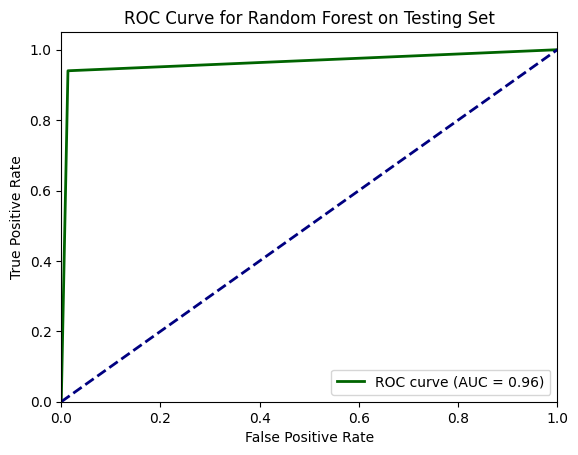

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

# Train the random forest model
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_rf_val = model_rf.predict(X_val)

# Evaluate the random forest model on the validation set
accuracy_rf_val = accuracy_score(y_val, y_pred_rf_val)
precision_rf_val = precision_score(y_val, y_pred_rf_val)
recall_rf_val = recall_score(y_val, y_pred_rf_val)
f1_rf_val = f1_score(y_val, y_pred_rf_val)
auc_roc_rf_val = roc_auc_score(y_val, y_pred_rf_val)

# Print the evaluation metrics for random forest on the validation set
print("Random Forest Validation Evaluation Metrics:")
print("Accuracy:", accuracy_rf_val)
print("Precision:", precision_rf_val)
print("Recall:", recall_rf_val)
print("F1 Score:", f1_rf_val)
print("AUC-ROC:", auc_roc_rf_val)

# Make predictions on the testing set
y_pred_rf_test = model_rf.predict(X_test)

# Evaluate the random forest model on the testing set
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
precision_rf_test = precision_score(y_test, y_pred_rf_test)
recall_rf_test = recall_score(y_test, y_pred_rf_test)
f1_rf_test = f1_score(y_test, y_pred_rf_test)
auc_roc_rf_test = roc_auc_score(y_test, y_pred_rf_test)

# Print the evaluation metrics for random forest on the testing set
print("Random Forest Testing Evaluation Metrics:")
print("Accuracy:", accuracy_rf_test)
print("Precision:", precision_rf_test)
print("Recall:", recall_rf_test)
print("F1 Score:", f1_rf_test)
print("AUC-ROC:", auc_roc_rf_test)

# Calculate the false positive rate (FPR) and true positive rate (TPR) for the random forest model on the testing set
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf_test)

# Calculate the area under the ROC curve (AUC-ROC) for the random forest model on the testing set
auc_roc_rf = roc_auc_score(y_test, y_pred_rf_test)

# Plot the ROC curve for the random forest model on the testing set
plt.plot(fpr_rf, tpr_rf, color='darkgreen', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest on Testing Set')
plt.legend(loc="lower right")
plt.show()

SVM

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

# Train the SVM model
model_svm = SVC(kernel='linear', probability=True)
model_svm.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_svm_val = model_svm.predict(X_val)

# Evaluate the SVM model on the validation set
accuracy_svm_val = accuracy_score(y_val, y_pred_svm_val)
precision_svm_val = precision_score(y_val, y_pred_svm_val)
recall_svm_val = recall_score(y_val, y_pred_svm_val)
f1_svm_val = f1_score(y_val, y_pred_svm_val)
auc_roc_svm_val = roc_auc_score(y_val, y_pred_svm_val)

# Print the evaluation metrics for SVM on the validation set
print("SVM Validation Evaluation Metrics:")
print("Accuracy:", accuracy_svm_val)
print("Precision:", precision_svm_val)
print("Recall:", recall_svm_val)
print("F1 Score:", f1_svm_val)
print("AUC-ROC:", auc_roc_svm_val)

# Make predictions on the testing set
y_pred_svm_test = model_svm.predict(X_test)

# Evaluate the SVM model on the testing set
accuracy_svm_test = accuracy_score(y_test, y_pred_svm_test)
precision_svm_test = precision_score(y_test, y_pred_svm_test)
recall_svm_test = recall_score(y_test, y_pred_svm_test)
f1_svm_test = f1_score(y_test, y_pred_svm_test)
auc_roc_svm_test = roc_auc_score(y_test, y_pred_svm_test)

# Print the evaluation metrics for SVM on the testing set
print("SVM Testing Evaluation Metrics:")
print("Accuracy:", accuracy_svm_test)
print("Precision:", precision_svm_test)
print("Recall:", recall_svm_test)
print("F1 Score:", f1_svm_test)
print("AUC-ROC:", auc_roc_svm_test)

# Calculate the false positive rate (FPR) and true positive rate (TPR) for the SVM model on the testing set
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_svm_test)

# Calculate the area under the ROC curve (AUC-ROC) for the SVM model on the testing set
auc_roc_svm = roc_auc_score(y_test, y_pred_svm_test)

# Plot the ROC curve for the SVM model on the testing set
plt.plot(fpr_svm, tpr_svm, color='darkgreen', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM on Testing Set')
plt.legend(loc="lower right")
plt.show()

KNN

KNN Validation Evaluation Metrics:
Accuracy: 0.9616277869529315
Precision: 0.9861488321564367
Recall: 0.9364522618249342
F1 Score: 0.9606582533005265
AUC-ROC: 0.9616420875352402
KNN Testing Evaluation Metrics:
Accuracy: 0.9629954582989265
Precision: 0.984698567180319
Recall: 0.9405567319113773
F1 Score: 0.9621216123408527
AUC-ROC: 0.9629804135084248


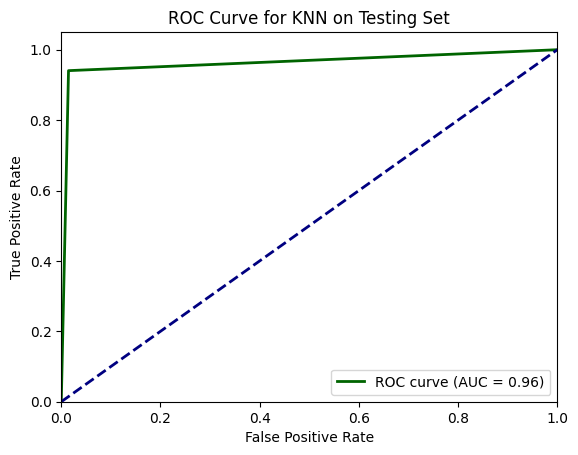

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

# Train the KNN model
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_knn_val = model_knn.predict(X_val)

# Evaluate the KNN model on the validation set
accuracy_knn_val = accuracy_score(y_val, y_pred_knn_val)
precision_knn_val = precision_score(y_val, y_pred_knn_val)
recall_knn_val = recall_score(y_val, y_pred_knn_val)
f1_knn_val = f1_score(y_val, y_pred_knn_val)
auc_roc_knn_val = roc_auc_score(y_val, y_pred_knn_val)

# Print the evaluation metrics for KNN on the validation set
print("KNN Validation Evaluation Metrics:")
print("Accuracy:", accuracy_knn_val)
print("Precision:", precision_knn_val)
print("Recall:", recall_knn_val)
print("F1 Score:", f1_knn_val)
print("AUC-ROC:", auc_roc_knn_val)

# Make predictions on the testing set
y_pred_knn_test = model_knn.predict(X_test)

# Evaluate the KNN model on the testing set
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
precision_knn_test = precision_score(y_test, y_pred_knn_test)
recall_knn_test = recall_score(y_test, y_pred_knn_test)
f1_knn_test = f1_score(y_test, y_pred_knn_test)
auc_roc_knn_test = roc_auc_score(y_test, y_pred_knn_test)

# Print the evaluation metrics for KNN on the testing set
print("KNN Testing Evaluation Metrics:")
print("Accuracy:", accuracy_knn_test)
print("Precision:", precision_knn_test)
print("Recall:", recall_knn_test)
print("F1 Score:", f1_knn_test)
print("AUC-ROC:", auc_roc_knn_test)

# Calculate the false positive rate (FPR) and true positive rate (TPR) for the KNN model on the testing set
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_knn_test)

# Calculate the area under the ROC curve (AUC-ROC) for the KNN model on the testing set
auc_roc_knn = roc_auc_score(y_test, y_pred_knn_test)

# Plot the ROC curve for the KNN model on the testing set
plt.plot(fpr_knn, tpr_knn, color='darkgreen', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN on Testing Set')
plt.legend(loc="lower right")
plt.show()

LR

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Validation Evaluation Metrics:
Accuracy: 0.9536281998348473
Precision: 0.9770321876704855
Recall: 0.9286492092299715
F1 Score: 0.9522265053834906
AUC-ROC: 0.9535114336076401
Logistic Regression Testing Evaluation Metrics:
Accuracy: 0.9537056151940545
Precision: 0.9785516979905757
Recall: 0.9281787824300025
F1 Score: 0.9526998523518245
AUC-ROC: 0.9538234089471525


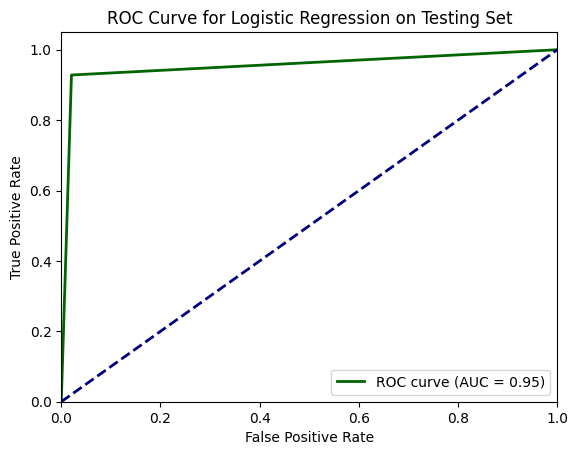

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

# Train the logistic regression model
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_lr_val = model_lr.predict(X_val)

# Evaluate the logistic regression model on the validation set
accuracy_lr_val = accuracy_score(y_val, y_pred_lr_val)
precision_lr_val = precision_score(y_val, y_pred_lr_val)
recall_lr_val = recall_score(y_val, y_pred_lr_val)
f1_lr_val = f1_score(y_val, y_pred_lr_val)
auc_roc_lr_val = roc_auc_score(y_val, y_pred_lr_val)

# Print the evaluation metrics for logistic regression on the validation set
print("Logistic Regression Validation Evaluation Metrics:")
print("Accuracy:", accuracy_lr_val)
print("Precision:", precision_lr_val)
print("Recall:", recall_lr_val)
print("F1 Score:", f1_lr_val)
print("AUC-ROC:", auc_roc_lr_val)

# Make predictions on the testing set
y_pred_lr_test = model_lr.predict(X_test)

# Evaluate the logistic regression model on the testing set
accuracy_lr_test = accuracy_score(y_test, y_pred_lr_test)
precision_lr_test = precision_score(y_test, y_pred_lr_test)
recall_lr_test = recall_score(y_test, y_pred_lr_test)
f1_lr_test = f1_score(y_test, y_pred_lr_test)
auc_roc_lr_test = roc_auc_score(y_test, y_pred_lr_test)

# Print the evaluation metrics for logistic regression on the testing set
print("Logistic Regression Testing Evaluation Metrics:")
print("Accuracy:", accuracy_lr_test)
print("Precision:", precision_lr_test)
print("Recall:", recall_lr_test)
print("F1 Score:", f1_lr_test)
print("AUC-ROC:", auc_roc_lr_test)

# Calculate the false positive rate (FPR) and true positive rate (TPR) for the logistic regression model on the testing set
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_lr_test)

# Calculate the area under the ROC curve (AUC-ROC) for the logistic regression model on the testing set
auc_roc_lr = roc_auc_score(y_test, y_pred_lr_test)

# Plot the ROC curve for the logistic regression model on the testing set
plt.plot(fpr_lr, tpr_lr, color='darkgreen', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression on Testing Set')
plt.legend(loc="lower right")
plt.show()

ET

ExtraTreesClassifier Validation Evaluation Metrics:
Accuracy: 0.9627116019818331
Precision: 0.9862625381596162
Recall: 0.9381384495722064
F1 Score: 0.9615987669085014
AUC-ROC: 0.9625967328767182
ExtraTreesClassifier Testing Evaluation Metrics:
Accuracy: 0.962737407101569
Precision: 0.986764626438334
Recall: 0.9384022604675057
F1 Score: 0.9619759848325258
AUC-ROC: 0.9628497018104626


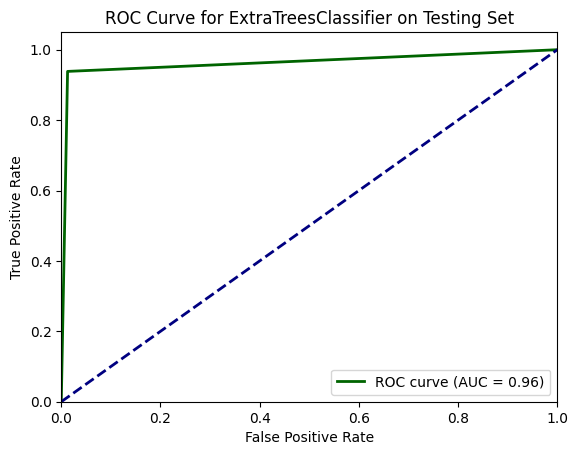

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

# Train the ExtraTreesClassifier model
model_etc = ExtraTreesClassifier()
model_etc.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_etc_val = model_etc.predict(X_val)

# Evaluate the ExtraTreesClassifier model on the validation set
accuracy_etc_val = accuracy_score(y_val, y_pred_etc_val)
precision_etc_val = precision_score(y_val, y_pred_etc_val)
recall_etc_val = recall_score(y_val, y_pred_etc_val)
f1_etc_val = f1_score(y_val, y_pred_etc_val)
auc_roc_etc_val = roc_auc_score(y_val, y_pred_etc_val)

# Print the evaluation metrics for ExtraTreesClassifier on the validation set
print("ExtraTreesClassifier Validation Evaluation Metrics:")
print("Accuracy:", accuracy_etc_val)
print("Precision:", precision_etc_val)
print("Recall:", recall_etc_val)
print("F1 Score:", f1_etc_val)
print("AUC-ROC:", auc_roc_etc_val)

# Make predictions on the testing set
y_pred_etc_test = model_etc.predict(X_test)

# Evaluate the ExtraTreesClassifier model on the testing set
accuracy_etc_test = accuracy_score(y_test, y_pred_etc_test)
precision_etc_test = precision_score(y_test, y_pred_etc_test)
recall_etc_test = recall_score(y_test, y_pred_etc_test)
f1_etc_test = f1_score(y_test, y_pred_etc_test)
auc_roc_etc_test = roc_auc_score(y_test, y_pred_etc_test)

# Print the evaluation metrics for ExtraTreesClassifier on the testing set
print("ExtraTreesClassifier Testing Evaluation Metrics:")
print("Accuracy:", accuracy_etc_test)
print("Precision:", precision_etc_test)
print("Recall:", recall_etc_test)
print("F1 Score:", f1_etc_test)
print("AUC-ROC:", auc_roc_etc_test)

# Calculate the false positive rate (FPR) and true positive rate (TPR) for the ExtraTreesClassifier model on the testing set
fpr_etc, tpr_etc, thresholds_etc = roc_curve(y_test, y_pred_etc_test)

# Calculate the area under the ROC curve (AUC-ROC) for the ExtraTreesClassifier model on the testing set
auc_roc_etc = roc_auc_score(y_test, y_pred_etc_test)

# Plot the ROC curve for the ExtraTreesClassifier model on the testing set
plt.plot(fpr_etc, tpr_etc, color='darkgreen', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc_etc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ExtraTreesClassifier on Testing Set')
plt.legend(loc="lower right")
plt.show()

MLP

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

# Train the MLPClassifier model
model_mlp = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=300, activation='relu', solver='adam', random_state=42)
model_mlp.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_mlp_val = model_mlp.predict(X_val)

# Evaluate the MLPClassifier model on the validation set
accuracy_mlp_val = accuracy_score(y_val, y_pred_mlp_val)
precision_mlp_val = precision_score(y_val, y_pred_mlp_val)
recall_mlp_val = recall_score(y_val, y_pred_mlp_val)
f1_mlp_val = f1_score(y_val, y_pred_mlp_val)
auc_roc_mlp_val = roc_auc_score(y_val, y_pred_mlp_val)

# Print the evaluation metrics for MLPClassifier on the validation set
print("MLPClassifier Validation Evaluation Metrics:")
print("Accuracy:", accuracy_mlp_val)
print("Precision:", precision_mlp_val)
print("Recall:", recall_mlp_val)
print("F1 Score:", f1_mlp_val)
print("AUC-ROC:", auc_roc_mlp_val)

# Make predictions on the testing set
y_pred_mlp_test = model_mlp.predict(X_test)

# Evaluate the MLPClassifier model on the testing set
accuracy_mlp_test = accuracy_score(y_test, y_pred_mlp_test)
precision_mlp_test = precision_score(y_test, y_pred_mlp_test)
recall_mlp_test = recall_score(y_test, y_pred_mlp_test)
f1_mlp_test = f1_score(y_test, y_pred_mlp_test)
auc_roc_mlp_test = roc_auc_score(y_test, y_pred_mlp_test)

# Print the evaluation metrics for MLPClassifier on the testing set
print("MLPClassifier Testing Evaluation Metrics:")
print("Accuracy:", accuracy_mlp_test)
print("Precision:", precision_mlp_test)
print("Recall:", recall_mlp_test)
print("F1 Score:", f1_mlp_test)
print("AUC-ROC:", auc_roc_mlp_test)

# Calculate the false positive rate (FPR) and true positive rate (TPR) for the MLPClassifier model on the testing set
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, y_pred_mlp_test)

# Calculate the area under the ROC curve (AUC-ROC) for the MLPClassifier model on the testing set
auc_roc_mlp = roc_auc_score(y_test, y_pred_mlp_test)

# Plot the ROC curve for the MLPClassifier model on the testing set
plt.plot(fpr_mlp, tpr_mlp, color='darkgreen', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc_mlp)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for MLPClassifier on Testing Set')
plt.legend(loc="lower right")
plt.show()